# Student Dataset

## Imports and Seed

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Getting seed

In [87]:
with open("seed.txt", "r") as f:
    my_seed = int(f.read().strip())

print(f"Seed: {my_seed}")

Seed: 3356680259


In [88]:
np.random.default_rng(my_seed)

Generator(PCG64) at 0x70EEEEF6CD60

## Main Code and Class StudentDataset

### Q1.0

In [89]:
class StudentDataset:
    def __init__(self,num_students:int,seed:int):
        self.rng = np.random.default_rng(seed)
        self.total = num_students
        self.df = self.assemble_dataframe()

    def get_full_dataframe(self):
        return self.df #getter?

    def assemble_dataframe(self):
        df = pd.DataFrame({"id": range(1, self.total + 1)})
        df["gender"] = self.generate_gender()
        df["major"] = self.generate_major()
        df["program"] = self.generate_program(df["major"].tolist())
        df["GPA"] = self.generate_gpa(df["major"].tolist())
        return df
    
    def generate_gender(self):
        gender_list = []
        rng = self.rng
        for _ in range(self.total):
            r = rng.random()
            if r < 0.65:
                gender_list.append("Male")
            elif r < 0.65 + 0.33:
                gender_list.append("Female")
            else:
                gender_list.append("Other")
        return gender_list

    def generate_major(self):
        major_list = []
        rng = self.rng
        for _ in range(self.total):
            r = rng.random()
            if r < 0.7:
                major_list.append("B.Tech")
            elif r < 0.7 + 0.2:
                major_list.append("MS")
            else:
                major_list.append("PhD")
        return major_list
    
    def generate_program(self,majors:list[str]):
        program_list = []
        rng = self.rng

        for major in majors:
            if major == "B.Tech":
                program_list.append(rng.choice(["CSE", "ECE", "CHD", "CND"],p=[0.4,0.4,0.1,0.1]))
            elif major == "MS":
                program_list.append(rng.choice(["CSE", "ECE", "CHD", "CND"],p=[0.3,0.3,0.2,0.2]))
            else:
                program_list.append(rng.choice(["CSE", "ECE", "CHD", "CND"])) ## all are same nahi likhuga ;)
        return program_list
    
    def generate_gpa(self,majors:list[str]):
        gpa_list = []
        rng = self.rng
        for major in majors:
            if major == "B.Tech":
                val = rng.normal(7.0,1.0)
                
            elif major == "MS":
                val = rng.normal(8.0,0.7)
            else:
                val = rng.normal(8.3,0.5)
            val = np.clip(val,4.0,10.0)
            gpa_list.append(val)
        return gpa_list 

creating instance of now as per the question will use it

In [90]:
stud_data = StudentDataset(10000,int(my_seed))

In [91]:
stud_data.get_full_dataframe().head()
print(f"Total Btech students : {len(stud_data.get_full_dataframe()[stud_data.df['major'] == 'B.Tech'])}")

Total Btech students : 7044


### Q1.1

Making the classes needed for this part 

1. Visualize - for all the visualizations all plt logic is written here 
2. Analyse - For part b and c where we have to get some results and then we have to make a heatmap also.

In [92]:
class Visualize:
    def __init__(self,data):
        self.df = data
    
    def _add_watermark(self, ax):
        """Helper to add watermark to a plot."""
        ax.text(0.95, 0.95, "nidhish.jain",
                ha='right', va='top',
                transform=ax.transAxes,
                fontsize=10, color='gray', alpha=0.7)
    
    def plot_gender_distribution(self):
        '''
        Bar graph for plotting gender distribution
        '''
        gender_counts = self.df['gender'].value_counts()
        plt.bar(gender_counts.index, gender_counts.values,label='Gender')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.title('Gender Distribution')
        # Add % values on top of bars
        total = gender_counts.sum()
        for i, (gender, count) in enumerate(gender_counts.items()):
            percent = count / total * 100
            plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center', fontsize=10, color="black")
        # plt.legend()
        self._add_watermark(plt.gca())
        plt.show()

    def plot_major_distribution(self):
        '''
        Bar graph for plotting major distribution
        '''
        major_counts = self.df['major'].value_counts()
        plt.bar(major_counts.index, major_counts.values,label='Major')
        plt.xlabel('Major')
        plt.ylabel('Count')
        plt.title('Major Distribution')
        # Add % values on top of bars
        total = major_counts.sum()
        for i, (major, count) in enumerate(major_counts.items()):
            percent = count / total * 100
            plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center', fontsize=10, color="black")
        # plt.legend()
        self._add_watermark(plt.gca())
        plt.show()

    def plot_program_distribution(self):
        '''
        Bar graph for plotting program distribution
        '''
        program_counts = self.df['program'].value_counts()
        plt.bar(program_counts.index, program_counts.values,label='Program')
        plt.xlabel('Program')
        plt.ylabel('Count')
        plt.title('Program Distribution')
        # Add % values on top of bars
        total = program_counts.sum()
        for i, (program, count) in enumerate(program_counts.items()):
            percent = count / total * 100
            plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center', fontsize=10, color="black")
        # plt.legend()
        self._add_watermark(plt.gca())
        plt.show()

    def plot_gpa_distribution(self, bins: int = 20):
        '''
        Histogram for gpa as gpa is continuous
        '''
        gpa_values = self.df['GPA']
        plt.xlabel('GPA Range')
        plt.ylabel('Count')
        plt.title('GPA Distribution')

        counts, bins, patches = plt.hist(gpa_values, bins=bins, color="purple", edgecolor="black", alpha=0.7)

        # Convert to percentage
        total = counts.sum()
        percentages = counts / total * 100

        # Add percentage labels
        for i, (count, pct) in enumerate(zip(counts, percentages)):
            if count > 0:
                plt.text(
                    (bins[i] + bins[i+1]) / 2, count + 0.5,
                    f"{pct:.1f}%", ha="center", fontsize=9, color="black"
                )

        # Show bin ranges instead of raw GPA values
        bin_labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]
        plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], bin_labels, rotation=45)

        self._add_watermark(plt.gca())

        plt.tight_layout()
        plt.show()

    def plot_program_by_major(self):
        """Plots the program distribution conditioned on major using a grouped bar chart."""
        plt.figure(figsize=(12, 8))
        
        # Use seaborn to simplify plotting and automatically handle bar positions
        ax = sns.countplot(x='major', hue='program', data=self.df, palette='tab10')
        
        plt.title('Program Distribution by Major')
        plt.xlabel('Major')
        plt.ylabel('Number of Students')
        plt.legend(title='Program', loc='upper right', bbox_to_anchor=(1.25, 1))

        
        # Iterate through the patches (bars) and add the count text
        for p in ax.patches:
            # Get bar height and position
            height = p.get_height()
            if height > 0:
                ax.text(
                    p.get_x() + p.get_width() / 2.,
                    height + 50, # Adjust the vertical offset for better visibility
                    f'{int(height)}',
                    ha='center',
                    va='bottom',
                    fontsize=10
                )

        self._add_watermark(ax)
        plt.show()

    def plot_gpa_by_major(self):
        """
        Box atnd violin plots for GPA distribution by major
        Violin plots visualizes the distribution of GPA also and through box plot
        we can know the 25%ile & 75 %ile quater and know the outliers
        """
        sns.violinplot(x='major', y='GPA', data=self.df, inner=None, color="lightgray", alpha=0.5)
        sns.boxplot(x='major', y='GPA', data=self.df)
        plt.title('GPA Distribution by Major')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        self._add_watermark(plt.gca())
        plt.show()

    def plot_gpa_by_program(self):
        '''
        Same as above but here distribution by major
        '''
        sns.violinplot(x='program', y='GPA', data=self.df, inner=None, color="lightgray", alpha=0.5)
        sns.boxplot(x='program', y='GPA', data=self.df)
        plt.title('GPA Distribution by Program')
        plt.xlabel('Program')
        plt.ylabel('GPA')
        self._add_watermark(plt.gca())
        plt.show()
    
    def plot_gpa_by_program_and_major(self):
        '''
        Here distribution being done both by program and major so hue is used to draw all plots
        '''
        sns.violinplot(x='major', y='GPA', hue='program', data=self.df, inner=None, alpha=0.5)
        sns.boxplot(x='major', y='GPA', hue='program', data=self.df)
        plt.title('GPA Distribution by Major and Program')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        self._add_watermark(plt.gca())
        plt.legend(title='Program')
        plt.show()

    def plot_sampled_dataset(self):
        '''
        Plotting as being asked 
        '''
        random_points = self.df.sample(n=100,random_state = my_seed)
        fig, axs = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Sampled Student Data Visualizations', fontsize=16)

        sns.countplot(x='gender', data=random_points, ax=axs[0, 0])
        axs[0, 0].set_title('Gender Distribution')
        axs[0, 0].set_xlabel('Gender')
        axs[0, 0].set_ylabel('Count')

        sns.countplot(x='major', data=random_points, ax=axs[0, 1])
        axs[0, 1].set_title('Major Distribution')
        axs[0, 1].set_xlabel('Major')
        axs[0, 1].set_ylabel('Count')

        sns.countplot(x='program', data=random_points, ax=axs[1, 0])
        axs[1, 0].set_title('Program Distribution')
        axs[1, 0].set_xlabel('Program')
        axs[1, 0].set_ylabel('Count')

        sns.histplot(random_points['GPA'], bins=10, ax=axs[1, 1], color='purple', alpha=0.7)
        axs[1, 1].set_title('GPA Distribution')
        axs[1, 1].set_xlabel('GPA')
        axs[1, 1].set_ylabel('Count')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        for ax in axs.flat:
            self._add_watermark(ax)
        plt.show()

    def plot_entire_dataset_summary(self):
        """
        Enhanced pairplot visualization with multiple perspectives of the dataset
        """
        df = self.df.copy()
        fig, axes_grid = plt.subplots(4, 4, figsize=(16, 16))
        col_names = df.columns.tolist()
        features= ["GPA","program","major","gender"]
        for i in range(4):
            for j in range(4):
                ax = axes_grid[i, j]
                feat_x = features[i]
                feat_y = features[j]

                if feat_x == feat_y:
                    # Diagonal plots
                    if feat_x == "GPA":
                        sns.histplot(df[feat_x], bins=20, ax=ax, color="purple", alpha=0.7)
                        ax.set_title(f"Distribution of {feat_x}")
                    else:
                        sns.countplot(x=feat_x, data=df, ax=ax)
                        ax.set_title(f"Count of {feat_x}")
                
                else:
                    # Off-diagonal plots
                    if feat_x == "GPA" and feat_y != "GPA":
                        # numeric vs categorical -> scatterplot (as requested)
                        sns.scatterplot(x=feat_x, y=feat_y, data=df, ax=ax)
                        ax.set_title(f"Scatter: {feat_y} vs {feat_x}")
                    elif feat_y == "GPA" and feat_x != "GPA":
                        # categorical vs numeric -> boxplot (as requested)
                        sns.boxplot(x=feat_x, y=feat_y, data=df, ax=ax)
                        ax.set_title(f"Boxplot: {feat_y} by {feat_x}")
                    elif feat_x != "GPA" and feat_y != "GPA":
                        # both categorical -> contingency heatmap
                        ctab = pd.crosstab(df[feat_y], df[feat_x])
                        ####Making paired bar graph
                        ctab.plot(kind='bar', ax=ax)
                        ax.set_title(f"Paired Bar: {feat_y} vs {feat_x}")

                ax.set_xlabel(feat_x)
                ax.set_ylabel(feat_y)

        plt.tight_layout()
        self._add_watermark(plt.gca())
        plt.show()

In [93]:
class Analyse:

    def __init__(self, data):
        self.df = data

    def _add_watermark(self, ax):
        """Helper to add watermark to a plot."""
        ax.text(0.95, 0.95, "nidhish.jain",
                ha='right', va='top',
                transform=ax.transAxes,
                fontsize=10, color='gray', alpha=0.7)
        
    def gpa_mean_std(self):
        mean = self.df['GPA'].mean()
        std_dev = self.df['GPA'].std()
        return (mean,std_dev)

    def count_students_per_program_major_pair(self):
        new_df = self.df.groupby(['major', 'program'])
        # print(type(new_df)) ## ok most scary thing I saw till now 
        ## we have to use .size() function to count occurences
        new_df = new_df.size()
        # print(type(new_df)) ## type is series now 
        ## series -> one d labeled array \
        ## index - the labells
        ## vals - our case num of students
        ## finally do unstack so that what happens is some column of index goes up
        new_df = new_df.unstack(level=-1,fill_value=None) ## level = -1 means last column index ko upar leja
        # print(type(new_df)) ## of type df
        return new_df
    
    def visualize_students_per_program_major_pair(self,counts_df):
        sns.heatmap(counts_df, annot=True, fmt='d', cmap='YlGnBu')
        plt.title('Heatmap of students count by major and program')
        plt.xlabel('Program')
        plt.ylabel('Major')
        self._add_watermark(plt.gca())
        plt.show()


In [94]:
vis_obj = Visualize(stud_data.get_full_dataframe())

In [95]:
vis_obj.df.head()

,id,gender,major,program,GPA
0,1,Male,B.Tech,CSE,8.947960
1,2,Female,B.Tech,ECE,9.653932
2,3,Male,B.Tech,ECE,7.281660
3,4,Male,B.Tech,CSE,6.248276
4,5,Male,PhD,CND,8.913198


In [96]:
ana_obj = Analyse(stud_data.get_full_dataframe())

#### Q1.1 a)

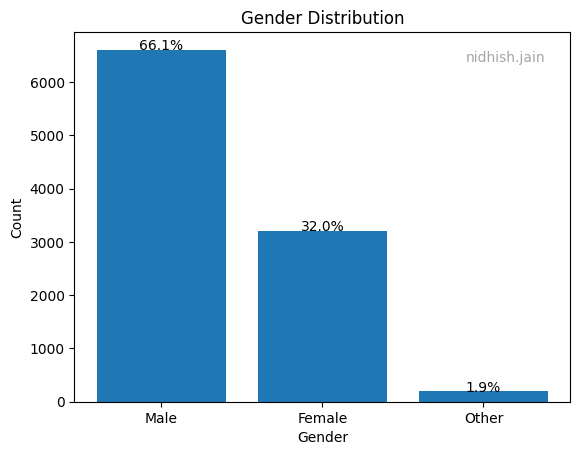

In [97]:
vis_obj.plot_gender_distribution()

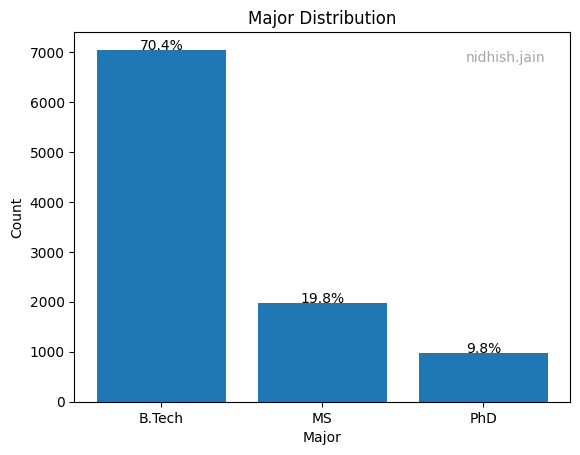

In [98]:
vis_obj.plot_major_distribution()

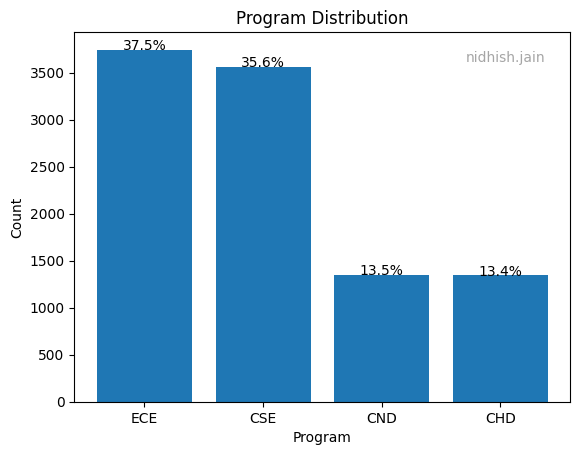

In [99]:
vis_obj.plot_program_distribution()

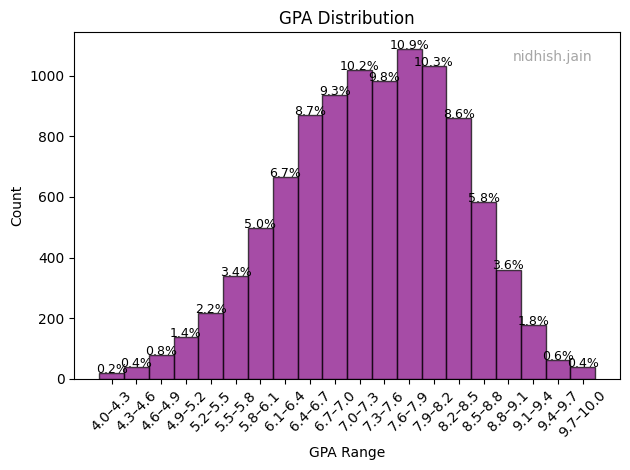

In [100]:
vis_obj.plot_gpa_distribution()

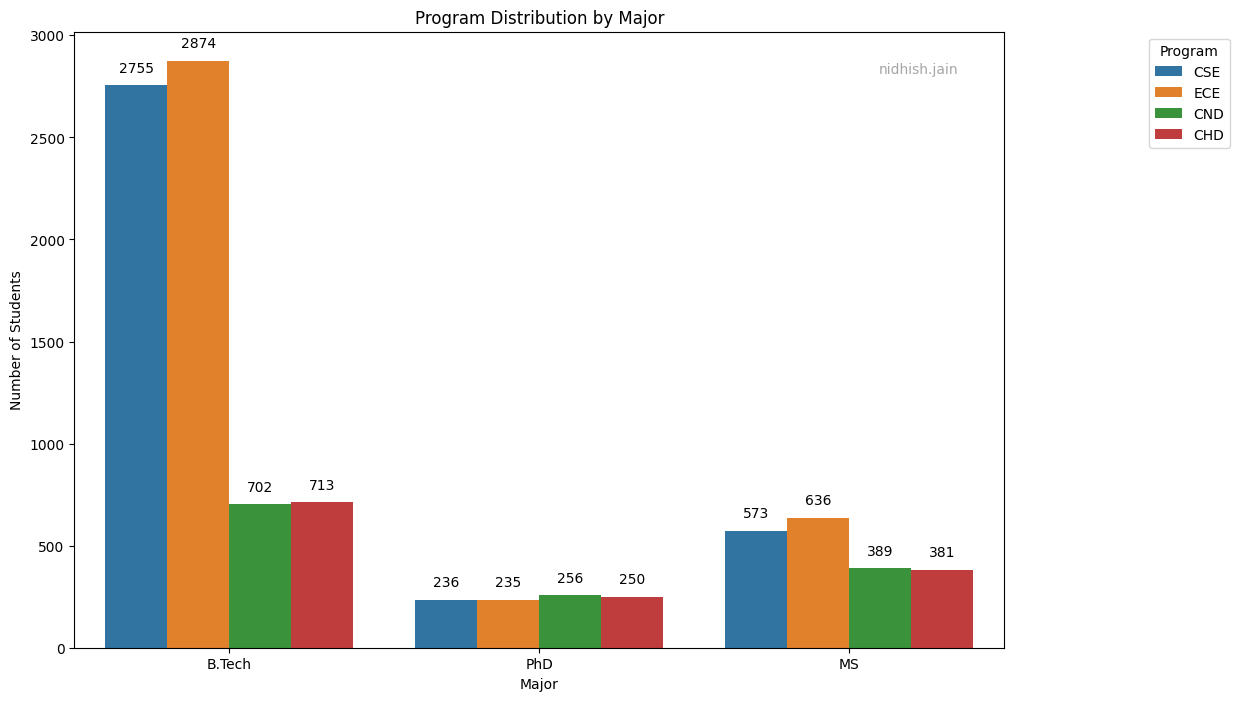

In [101]:
vis_obj.plot_program_by_major()

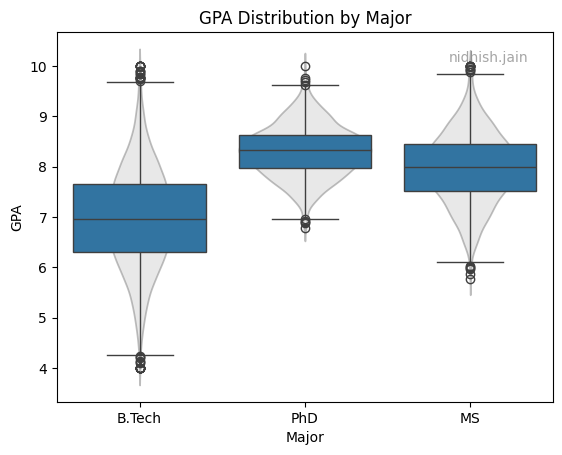

In [102]:
vis_obj.plot_gpa_by_major()

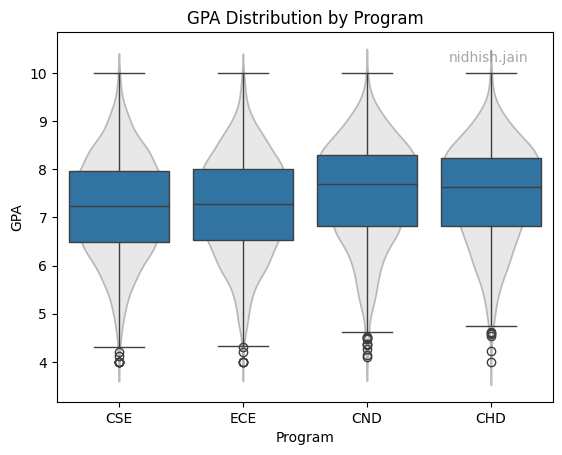

In [103]:
vis_obj.plot_gpa_by_program()

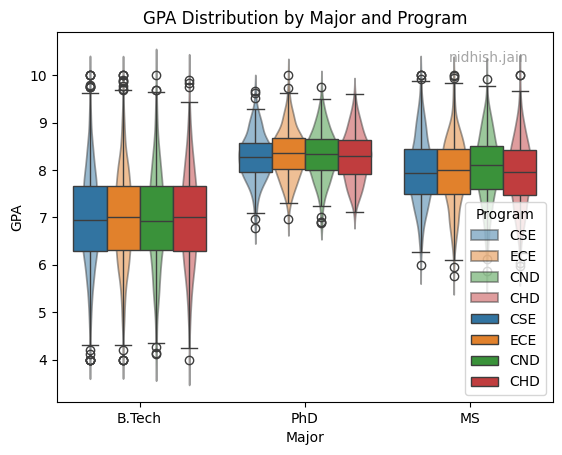

In [104]:
vis_obj.plot_gpa_by_program_and_major()

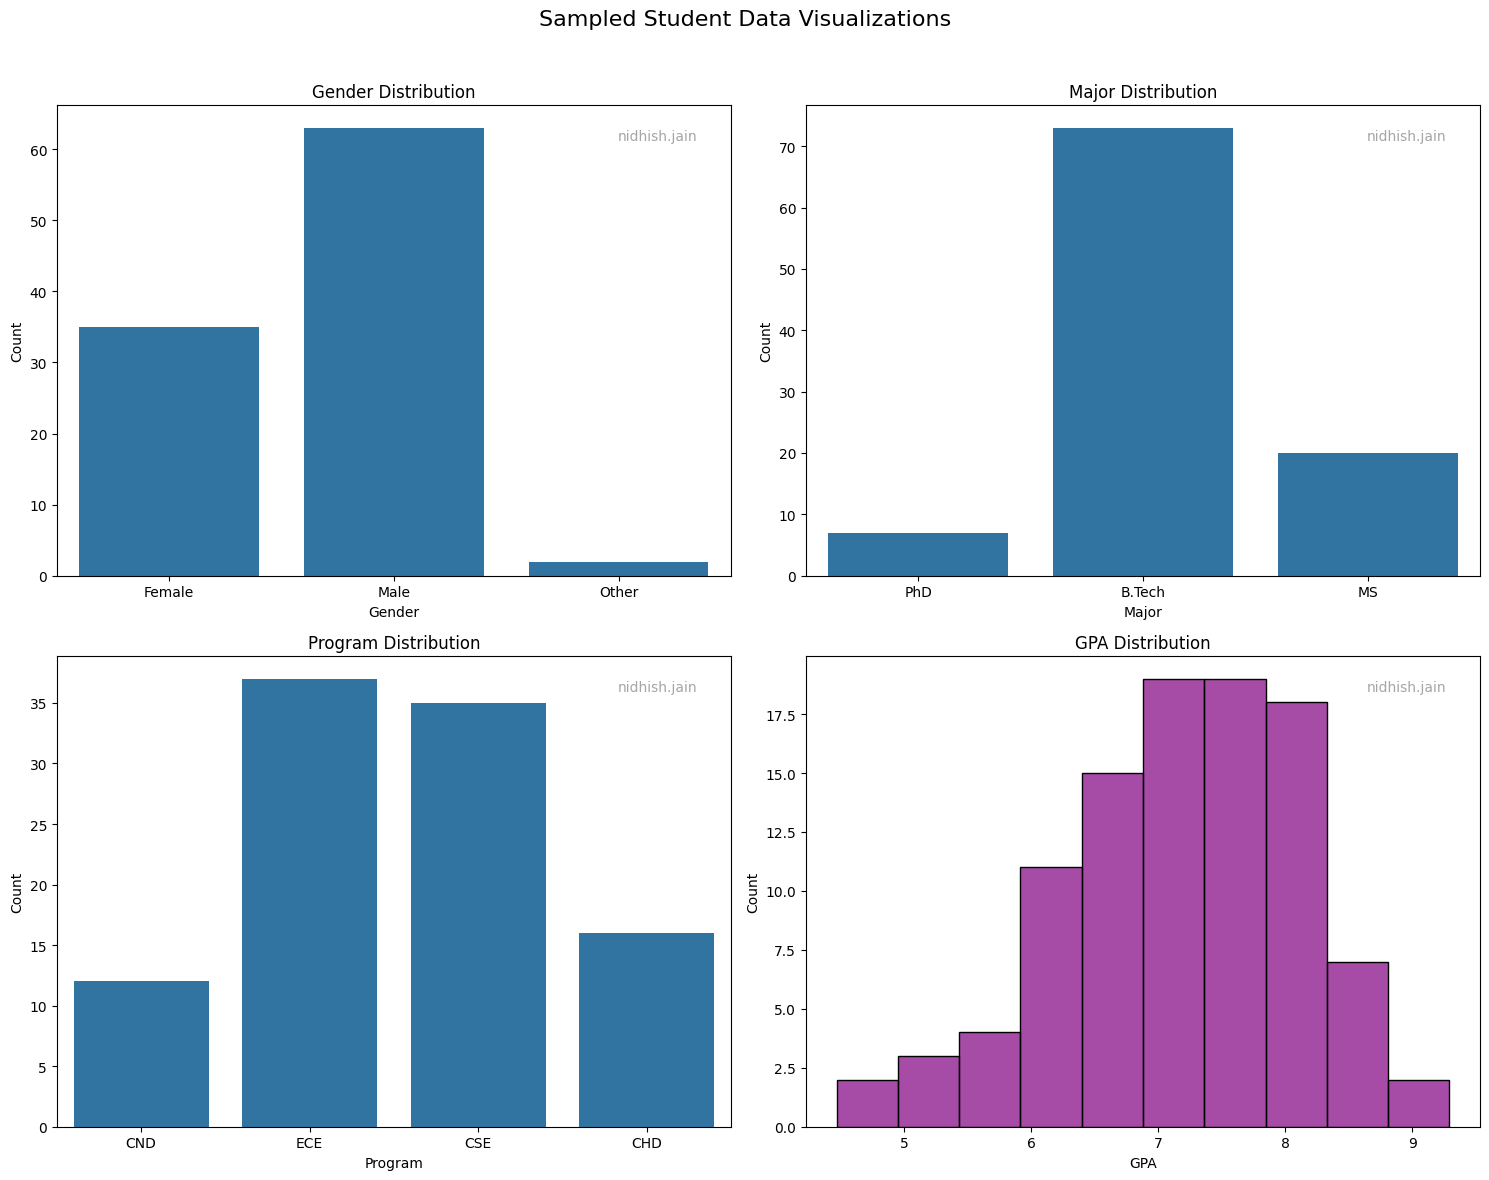

In [105]:
vis_obj.plot_sampled_dataset()

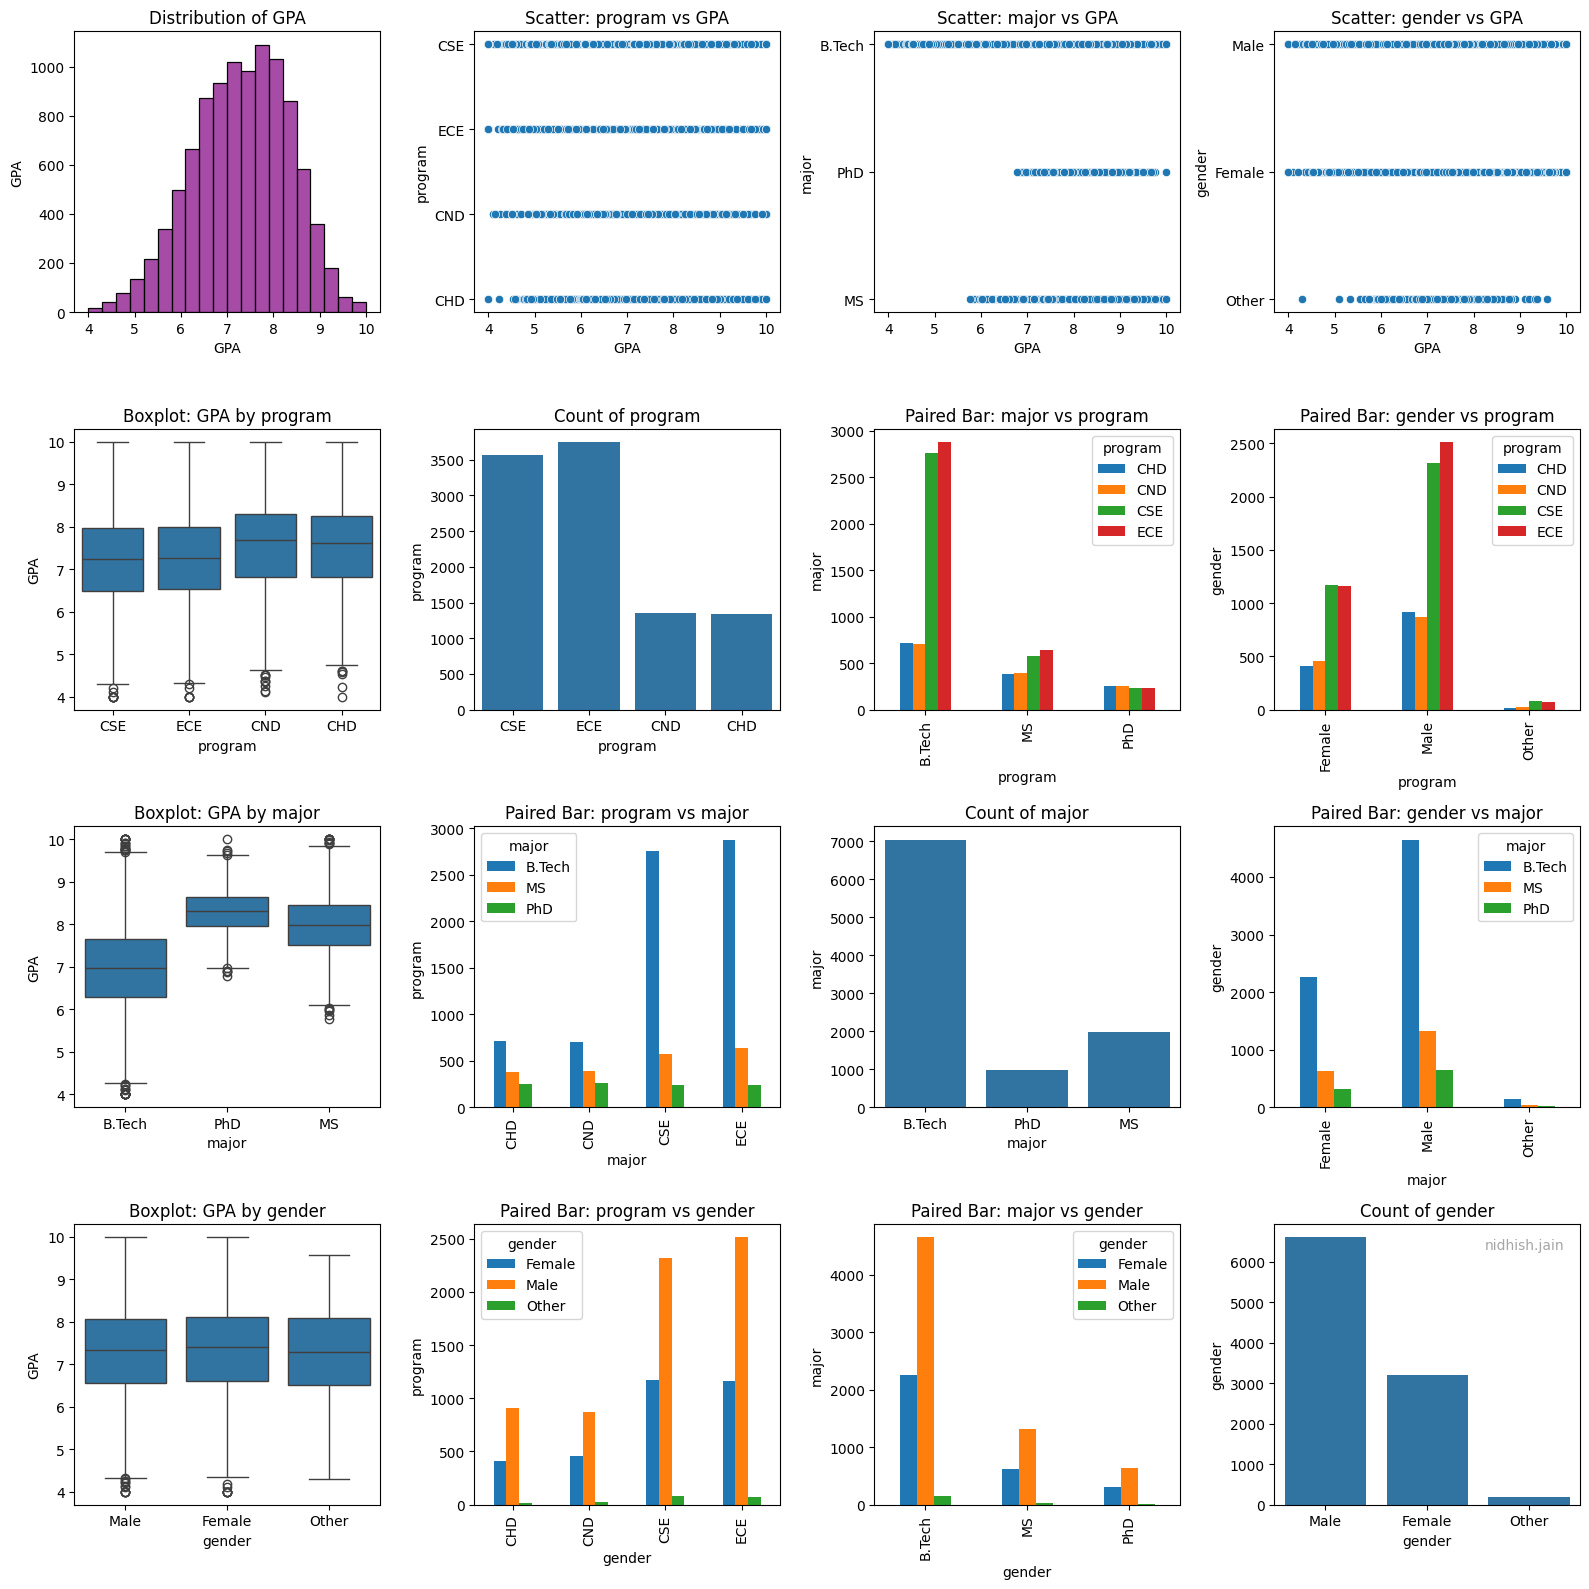

In [106]:
vis_obj.plot_entire_dataset_summary() 

#### Q1.1 b)

In [107]:
ana_obj.gpa_mean_std()

(7.303243407855739, 1.0396702431216938)

Observations - 
1. The mean is coming up to be 7.3 which is very close to the mean GPA of the Btech students as they occupy the maximum %of students in the dataset as well as the std deviation comes up to be close to them.
2. However the increase in mean is more than the increase in std deviation because the mean for ms and phd students is 8 and 8.3 which will increase the mean more however despite the std dev being 0.7 and 0.5 for MS and PhD we still see the std deviation to be >1 this indicates that there are outliers present in the dataset which is affecting the overall distribution.
3. A better explanation could be that the overall std dev depends on the sum of the weighted average of the component variances and the variance of the component means. So this new term addition increases the std deviation slightly rather than decreasing.
4. In case of mean its just weighted mean so comes near to expected val of 7.3

#### Q1.1 c)

In [108]:
ana_df = ana_obj.count_students_per_program_major_pair()

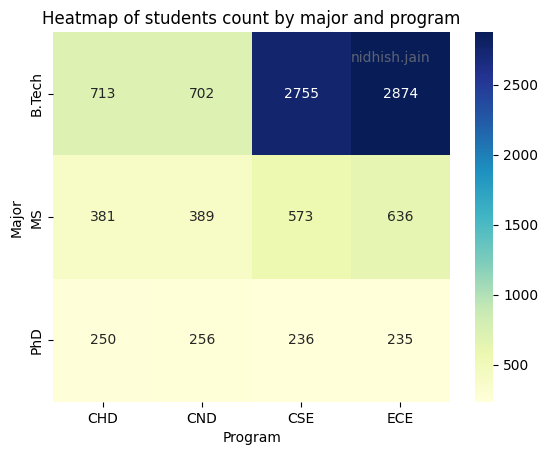

In [109]:
ana_obj.visualize_students_per_program_major_pair(ana_df)

The counts are in the heatmap matrix where the value is being shown as the count of occurrences for each combination of features.
Observation in pattern is that the distribution of counts is not uniform across all combinations, indicates the generated dataset is as per the given instructions with more towards btech as they are major and more towards CSE and ECE as they had maximum students.
 IN PhD all had equal as each was 25 %

### Q 1.2

Making sampling class which will implement the 2 mehtods.

In [110]:
class Sampling:
    def __init__(self, data):
        self.df = data
        self.rng = np.random.default_rng(my_seed)

    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50):
        means = []
        stds = []
        for _ in range(repeats):
            sample = self.df.sample(n=n, random_state=self.rng.integers(0, 1e9))
            means.append(sample['GPA'].mean())
            stds.append(sample['GPA'].std())
        avg_mean = np.mean(means)
        avg_std = np.mean(stds)
        return (avg_mean, avg_std)

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50):
        means = []
        stds = []
        major_props = self.df['major'].value_counts(normalize=True)
        for _ in range(repeats):
            parts = []
            for major, prop in major_props.items():
                n_major = int(round(prop * n))
                if n_major > 0:
                    parts.append(
                        self.df[self.df['major'] == major].sample(n=n_major, replace=False, random_state=self.rng.integers(0, 1e9))
                    )
            sample = pd.concat(parts, ignore_index=True)
            means.append(sample['GPA'].mean())
            stds.append(sample['GPA'].std())
        avg_mean = np.mean(means)
        avg_std = np.mean(stds)
        return (avg_mean, avg_std)


In [111]:
sampl_obj = Sampling(stud_data.df)

In [112]:
### printing orignal mean and std
print("Original Mean and Std:")
print("Mean:", stud_data.df['GPA'].mean())
print("Std:", stud_data.df['GPA'].std())

Original Mean and Std:
Mean: 7.303243407855739
Std: 1.0396702431216938


In [113]:
### printing the closeness of both avg and std devs
random_means_stds = sampl_obj.get_gpa_mean_std_random()
stratified_means_stds = sampl_obj.get_gpa_mean_std_stratified()

print("Random Sampling:")
print("Mean:", random_means_stds[0])
print("Std:", random_means_stds[1])

print("\nStratified Sampling:")
print("Mean:", stratified_means_stds[0])
print("Std:", stratified_means_stds[1])

print("\n Closeness from Original")
print("Random Sampling:")
print("Mean Closeness:", abs(random_means_stds[0] - stud_data.df['GPA'].mean()))
print("Std Closeness:", abs(random_means_stds[1] - stud_data.df['GPA'].std()))

print("\nStratified Sampling:")
print("Mean Closeness:", abs(stratified_means_stds[0] - stud_data.df['GPA'].mean()))
print("Std Closeness:", abs(stratified_means_stds[1] - stud_data.df['GPA'].std()))

Random Sampling:
Mean: 7.300357007334634
Std: 1.0399239644896552

Stratified Sampling:
Mean: 7.3074223521142745
Std: 1.0383236027551284

 Closeness from Original
Random Sampling:
Mean Closeness: 0.0028864005211044486
Std Closeness: 0.00025372136796142364

Stratified Sampling:
Mean Closeness: 0.004178944258535822
Std Closeness: 0.0013466403665653992


#### 3rd question Explanation
We can see that in random sampling the mean comes up to be more closer to original than stratified but **stratified sampling** has lower std deviation

A simple explanation for this could be that we have sampled very less times as we increase the number of repeats then we will get closer results especially with stratified which can be observed by running the below cell

The reason stratified was having lower standard deviation because we sample from classes rather than randomly picking up and as classes have some similarity here the chances of picking up extreme  outlier decreases and we come up close to the real result and hence lower std deviation.

In [114]:
# random_means_stds = sampl_obj.get_gpa_mean_std_random(repeats=1000)
# stratified_means_stds = sampl_obj.get_gpa_mean_std_stratified(repeats=1000)

# print("Random Sampling:")
# print("Mean:", random_means_stds[0])
# print("Std:", random_means_stds[1])

# print("\nStratified Sampling:")
# print("Mean:", stratified_means_stds[0])
# print("Std:", stratified_means_stds[1])

# print("\n Closeness from Original")
# print("Random Sampling:")
# print("Mean Closeness:", abs(random_means_stds[0] - stud_data.df['GPA'].mean()))
# print("Std Closeness:", abs(random_means_stds[1] - stud_data.df['GPA'].std()))

# print("\nStratified Sampling:")
# print("Mean Closeness:", abs(stratified_means_stds[0] - stud_data.df['GPA'].mean()))
# print("Std Closeness:", abs(stratified_means_stds[1] - stud_data.df['GPA'].std()))

### Q1.3

In [115]:
class gender_sample:
    def __init__(self, data):
        self.df = data
        self.rng = np.random.default_rng(my_seed)

    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5):
        count = self.df['gender'].unique()
        num_gender = len(count)
        num_sample_each = n // num_gender
        final_list = []
        for _ in range(repeats):
            curr_dict = {}
            for g in count:
                curr_taken = []
                curr_taken = self.df[self.df['gender'] == g].sample(n=num_sample_each, replace=False, random_state=self.rng.integers(0, 1e9)).index.tolist()
                curr_dict[g] = len(curr_taken)
            final_list.append(curr_dict)
        return final_list

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5):
        gender_list = self.df['gender'].unique().tolist()
        grouped = {g: self.df[self.df['gender'] == g].index.tolist() for g in gender_list}
        all_res = []
        for _ in range(repeats):
            counts = {g: 0 for g in gender_list}
            for _ in range(n):
                chosen = self.rng.choice(gender_list)
                chosen_stud = self.rng.choice(grouped[chosen])
                counts[chosen] += 1
            all_res.append(counts)
        return all_res

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes=[300, 600, 900, 1200, 1500], repeats=10):
        gender_list = self.df['gender'].unique().tolist()
        grouped = {g: self.df[self.df['gender'] == g].index.tolist() for g in gender_list}
        avg_max_rel_diffs = []
        for n in sample_sizes:
            max_rel_diffs = []
            for _ in range(repeats):
                counts = {g: 0 for g in gender_list}
                for _ in range(n):
                    chosen = self.rng.choice(gender_list)
                    chosen_stud = self.rng.choice(grouped[chosen])
                    counts[chosen] += 1
                max_count = max(counts.values())
                min_count = min(counts.values())
                max_rel_diff = (max_count - min_count) / n
                max_rel_diffs.append(max_rel_diff)
            avg_max_rel_diffs.append(np.mean(max_rel_diffs))
        plt.figure(figsize=(8, 5))
        plt.bar([str(s) for s in sample_sizes], avg_max_rel_diffs)
        plt.xlabel('Sample Size (n)')
        plt.ylabel('Avg Max Relative Difference')
        plt.title('Avg Max Relative Gender Difference vs Sample Size')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()


In [116]:
gend_sample = gender_sample(stud_data.df)

In [117]:
gend_sample.get_gender_balanced_counts()

[{'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100}]

In [118]:
gend_sample.sample_gender_uniform_random()

[{'Male': 93, 'Female': 115, 'Other': 92},
 {'Male': 97, 'Female': 115, 'Other': 88},
 {'Male': 109, 'Female': 94, 'Other': 97},
 {'Male': 92, 'Female': 104, 'Other': 104},
 {'Male': 107, 'Female': 104, 'Other': 89}]

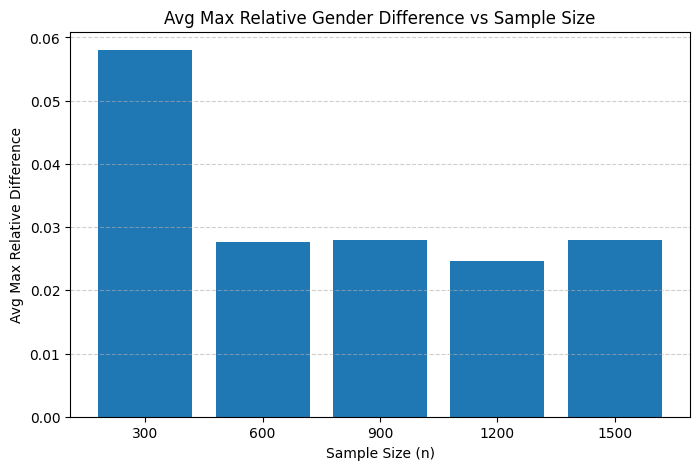

In [119]:
gend_sample.plot_avg_max_gender_diff_vs_sample_size()

### Q1.4

In [120]:
class GPA_Cohort:
    def __init__(self, data):
        self.df = data
        self.rng = np.random.default_rng(my_seed)
    
    def _add_watermark(self, ax):
        """Helper to add watermark to a plot."""
        ax.text(0.95, 0.95, "nidhish.jain",
                ha='right', va='top',
                transform=ax.transAxes,
                fontsize=10, color='gray', alpha=0.7)
        
    def sample_gpa_uniform(self, n: int = 100, bins: int = 10):
        df = self.df.copy()
        if len(df) == 0:
            return df.iloc[[]]
        gmin, gmax = df['GPA'].min(), df['GPA'].max()
        if gmin == gmax:
            return df.sample(min(n, len(df)), replace=False, random_state=self.rng.integers(0, 1e9))
        edges = np.linspace(gmin, gmax, bins + 1)
        df['_gpa_bin'] = pd.cut(df['GPA'], bins=edges, include_lowest=True, right=True)
        bin_to_indices = {
            b: df.index[df['_gpa_bin'] == b].tolist()
            for b in df['_gpa_bin'].cat.categories
        }
        target = n // bins
        remainder = n % bins
        quotas = {c: target for c in bin_to_indices}
        for c in list(bin_to_indices.keys())[:remainder]:
            quotas[c] += 1
        shortfall = 0
        for b in bin_to_indices:
            available = len(bin_to_indices[b])
            if available >= target:
                quotas[b] = target
            else:
                quotas[b] = available
                shortfall += (target - available)
        while shortfall > 0:
            spare_bins = [b for b in bin_to_indices if quotas[b] < len(bin_to_indices[b])]
            if not spare_bins:
                break
            for b in spare_bins:
                if shortfall == 0:
                    break
                if quotas[b] < len(bin_to_indices[b]):
                    quotas[b] += 1
                    shortfall -= 1
        selected = []
        for b in quotas:
            if quotas[b] > 0:
                selected.extend(
                    self.rng.choice(bin_to_indices[b], size=quotas[b], replace=False)
                )
        print("Number of students sampled from each GPA bin:")
        for b in quotas:
            if quotas[b] > 0:
                print(f"  {b}: {quotas[b]}")
        sampled_df = df.loc[selected].drop(columns=['_gpa_bin'])
        return sampled_df

    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame):
        plt.figure(figsize=(12, 6))
        gmin = min(self.df['GPA'].min(), sampled_df['GPA'].min())
        gmax = max(self.df['GPA'].max(), sampled_df['GPA'].max())
        edges = np.linspace(gmin, gmax, 11)
        bin_labels = [f"{edges[i]:.1f}–{edges[i+1]:.1f}" for i in range(len(edges) - 1)]
        bin_centers = [(edges[i] + edges[i+1]) / 2 for i in range(len(edges) - 1)]
        plt.subplot(1, 2, 1)
        sns.histplot(self.df['GPA'], bins=10, color='blue')
        plt.title('Original GPA Distribution')
        plt.xlabel('GPA')
        plt.xticks(bin_centers, bin_labels, rotation=45,ha='right')
        plt.ylabel('Count')
        plt.subplot(1, 2, 2)
        sns.histplot(sampled_df['GPA'], bins=10, color='orange')
        plt.title('Sampled GPA Distribution')
        plt.xlabel('GPA')
        plt.xticks(bin_centers, bin_labels, rotation=45, ha='right')
        plt.ylabel('Count')
        self._add_watermark(plt.gca())
        plt.tight_layout()
        plt.show()


In [121]:
gpa_cohort_obj = GPA_Cohort(stud_data.get_full_dataframe())
gpa_cohort_df = gpa_cohort_obj.sample_gpa_uniform()

Number of students sampled from each GPA bin:
  (3.999, 4.6]: 10
  (4.6, 5.2]: 10
  (5.2, 5.8]: 10
  (5.8, 6.4]: 10
  (6.4, 7.0]: 10
  (7.0, 7.6]: 10
  (7.6, 8.2]: 10
  (8.2, 8.8]: 10
  (8.8, 9.4]: 10
  (9.4, 10.0]: 10


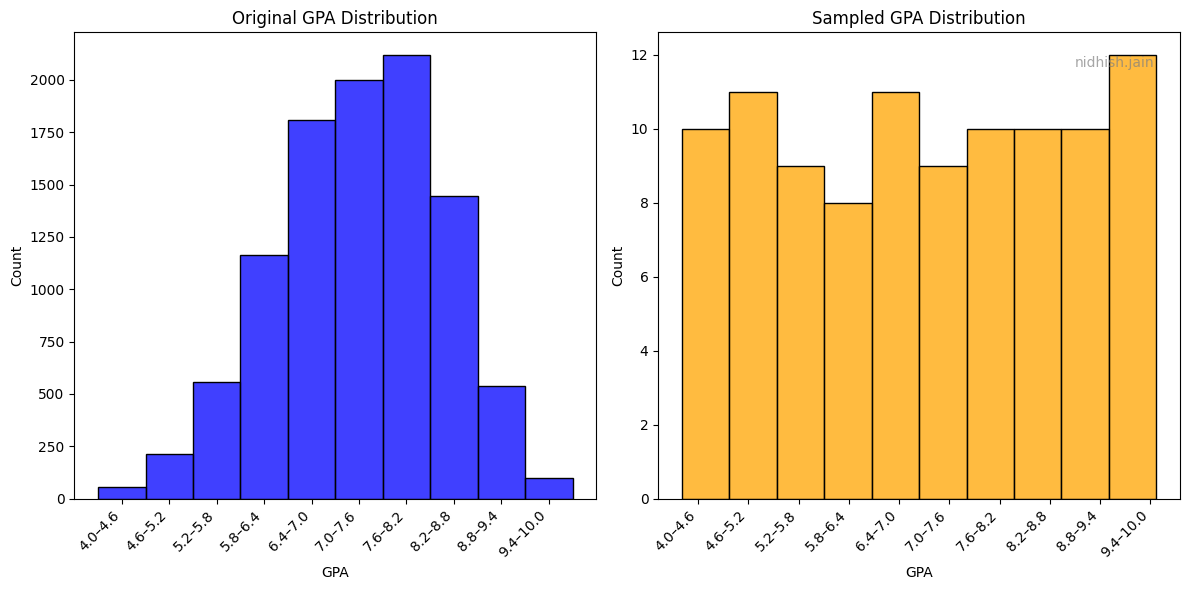

In [122]:
gpa_cohort_obj.plot_gpa_histogram_comparison(gpa_cohort_df)

#### Q3 Sampled with replacement or without?

Here sampling is done without replacement in the code `np.random.choice(bin_to_indices[b], size=quotas[b], replace=False)`is not replacing the selected students.

Reason - To avoid duplication of datapoints replacement is avoided. Due to my seed each of the bin had >=10 students but if there was some bin having less than 10 students then with replacement it might have happened that some bins get more represented than the orignal dataset. To avoid this one needs to do shortfall adjsutments by selecting more students from other bins to get near to the original dataset representation.

Another reason for without replacement is to avoid bias in sampling which can come up due to duplication and this can affect the statistics of the new sampled subset.

### Q1.5

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class Program_Major_cohort:
    def __init__(self, data: pd.DataFrame):
        self.df = data
        self.rng = np.random.default_rng(my_seed)
    
    def sample_program_major_balanced(self, n: int = 60):
        groups = self.df.groupby(["major", "program"])
        combos = list(groups.groups.keys())
        # for combo in combos:
        sampled = []
        for _ in range(n):
            combo = self.rng.choice(combos)
            combo_tuple = tuple(combo)
            # print(f"Selected combo: {combo}, type: {type(combo)}")

            group_df = groups.get_group(combo_tuple)
            sampled.append(group_df.sample(n=1,replace=False))

        return pd.concat(sampled, ignore_index=True)


    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame):
        counts = sampled_df.groupby(['program', 'major']).size().reset_index(name='count')
        print("Counts per (program, major):")
        print(counts)
        heatmap_data = counts.pivot(index='program', columns='major', values='count').fillna(0)
        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues')
        plt.title('Heatmap of Sampled Students by Program and Major')
        plt.xlabel('Major')
        plt.ylabel('Program')
        plt.show()


In [136]:
proj_maj_coh_obj = Program_Major_cohort(stud_data.get_full_dataframe())
proj_df = proj_maj_coh_obj.sample_program_major_balanced(n=60)
# print(len(proj_df) == 4800)


Counts per (program, major):
   program   major  count
0      CHD  B.Tech      6
1      CHD      MS      4
2      CHD     PhD      6
3      CND  B.Tech      6
4      CND      MS      2
5      CND     PhD      7
6      CSE  B.Tech      7
7      CSE      MS      7
8      CSE     PhD      1
9      ECE  B.Tech      5
10     ECE      MS      4
11     ECE     PhD      5


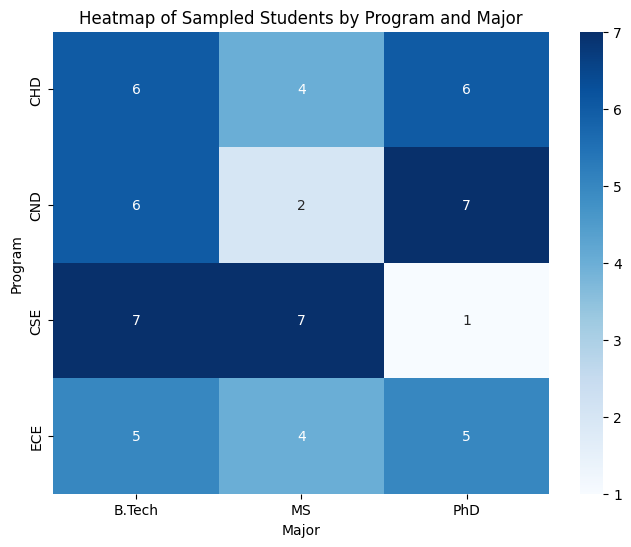

In [137]:
proj_maj_coh_obj.show_program_major_counts_and_heatmap(proj_df)

#### Q3 explanation

In my seed there were enough number of students for number of samples being 60. So no issues are there

But for higher number of samples we might face issue in that case we might do sampling with replacement to ensure we can still get the required number of samples.